## Lead Scoring Case Study

### Step 1: Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

from sklearn.preprocessing import scale
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Step 2: Read CSV file

In [2]:
lead= pd.read_csv("Leads.csv")

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

-  Missing values exist in data

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


-  Total Visits, Total Time Spent on Website, Page Views Per Visit, Asymmetrique Activity Score, Asymmetrique Profile Score are Continuous variables.

### Step 3: Handling 'Select' in Categorical Variables

#### Some categorical variables have Select, which is as good as null values. Because person did not select any value for it. Hence, decision to impute Select with Mode or with np.nan null values.

In [7]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

-  Since, this is a Questionnaire form that X Education has made, we might not know all Specializations of students. So replacing it with Others.

In [8]:
lead['Specialization']= lead['Specialization'].replace('Select', 'Others')

In [9]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
lead['Lead Profile']= lead['Lead Profile'].replace('Select', np.nan)

In [11]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [12]:
lead['How did you hear about X Education']= lead['How did you hear about X Education'].replace('Select', np.nan)

In [13]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
lead['City']= lead['City'].replace('Select', np.nan)

### Step 4: Missing Value Handling

In [15]:
print(lead.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
How did you hear about X Education               78.4632
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

#### High percentage of missing values in some columns. Hence, decision to drop coulmns with more than 45% mull values.

In [17]:
lead= lead.drop(lead.loc[:,list(round(percentage, 4)>45)].columns, 1)

In [18]:
lead.shape

(9240, 30)

-  7 columns dropped.

In [19]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                                          0.0000
Newspaper Article              

In [20]:
100*lead['Country'].value_counts(normalize= True)

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Canada                   0.059006
Germany                  0.059006
South Africa             0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Sweden                   0.044254
Asia/Pacific Region      0.029503
Philippines              0.029503
Netherlands              0.029503
Bangladesh               0.029503
China                    0.029503
Belgium                  0.029503
Uganda                   0.029503
Italy                    0.029503
Ghana                    0.029503
Indonesia                0.014751
Vietnam       

-  Data for country is extremely skewed. Hence, removing it from further analysis.

In [21]:
100*lead['City'].value_counts(normalize= True)

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

-  Data for city is skewed. Hence, removing it from further analysis.

In [22]:
lead= lead.drop(['Country', 'City'], axis=1)

In [23]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Specialization                                   15.5628
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                                          0.0000
Newspaper Article                                 0.0000
X Education Forums             

-  Tags is not relevant to analysis. Hence, removing it. Because it is used by Sales team.

In [24]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### Imputing Null with Others.

In [26]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Imputing null with Unemployed

In [28]:
lead['Specialization'].value_counts()

Others                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

#### Imputing null with Others

In [30]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Specialization                                    0.0000
What is your current occupation                   0.0000
What matters most to you in choosing a course     0.0000
Search                                            0.0000
Magazine                                          0.0000
Newspaper Article                                 0.0000
X Education Forums             

In [31]:
lead= lead.drop('Tags', axis=1)

In [32]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                      0.0000
Lead Number                                      0.0000
Lead Origin                                      0.0000
Lead Source                                      0.3896
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4827
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4827
Last Activity                                    1.1147
Specialization                                   0.0000
What is your current occupation                  0.0000
What matters most to you in choosing a course    0.0000
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                                0.0000
X Education Forums                              

-  Now removing Rows that have Null values.

In [33]:
lead.dropna(inplace= True)

In [34]:
percentage= lead.isnull().sum() * 100/ len(lead)
print(round(percentage, 4))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

-  The data cleaning and addressing data quality issues is done with the mindset that the questionnaire which is asked to fill by people can be improved. Hence, Others column is added wherever list provided is not exhaustive.
-  Otherwise, replaced with null np.nan

#### Step 4a: Retained Rows

In [35]:
lead.shape

(9074, 27)

In [36]:
retained_rows= ((9074*100)/9240)

In [37]:
print(retained_rows)

98.2034632034632


-  2% rows removed because of null values. This is acceptable.

In [38]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

-  Dropping Last Notable activity because it is an intermediate step. Final result is present in Last activity.

#### Checking for Skewness in data

In [39]:
lead= lead.drop('Last Notable Activity', axis=1)

In [40]:
lead['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [41]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [42]:
lead= lead.drop('I agree to pay the amount through cheque', axis=1)

In [43]:
lead['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [44]:
lead['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [45]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [46]:
lead['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [47]:
lead= lead.drop(['Get updates on DM Content','Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations'], axis=1)

In [48]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'A free copy of Mastering The Interview'],
      dtype='object')

In [49]:
lead['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [50]:
lead= lead.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement'], axis=1)

In [51]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [52]:
lead.shape

(9074, 15)

#### All skewed columns which do not add information to model, that is model will not learn from it are deleted.

### Step 5: Outlier Handling

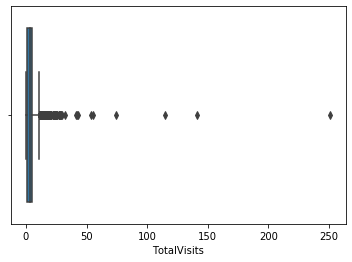

In [53]:
sns.boxplot(lead['TotalVisits'])

In [54]:
print(lead['TotalVisits'].quantile(0.95))

10.0


In [55]:
lead['TotalVisits']= np.where(lead['TotalVisits']> 10.0 , 10.0, lead['TotalVisits'])

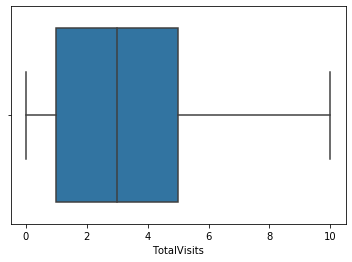

In [56]:
sns.boxplot(lead['TotalVisits'])

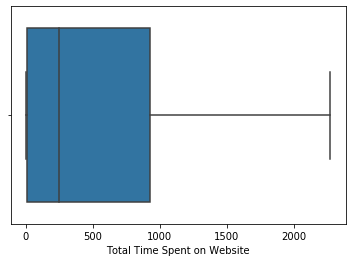

In [57]:
sns.boxplot(lead['Total Time Spent on Website'])

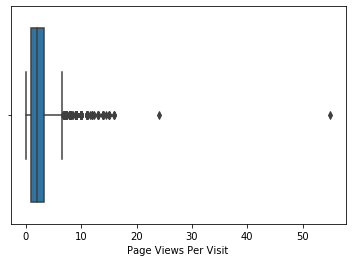

In [58]:
sns.boxplot(lead['Page Views Per Visit'])

In [59]:
print(lead['Page Views Per Visit'].quantile(0.95))

6.0


In [60]:
lead['Page Views Per Visit']= np.where(lead['Page Views Per Visit']> 6.0, 6.0, lead['Page Views Per Visit'])

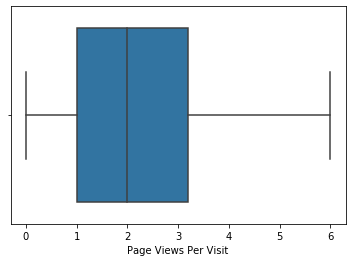

In [61]:
sns.boxplot(lead['Page Views Per Visit'])

### Step 6: Exploratory Data Analysis

-  Categorical
-  Continuous
-  Categorical-Categorical
-  Continuous-Continuous
-  Categorical-Continuous

In [62]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

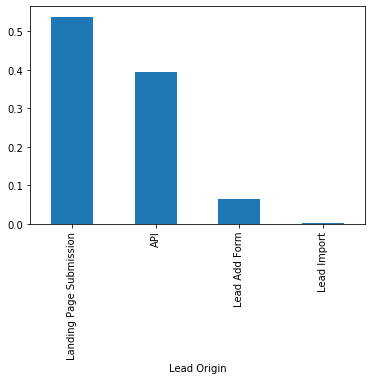

In [63]:
lead['Lead Origin'].value_counts(normalize= True).plot.bar()
plt.xlabel('Lead Origin')
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

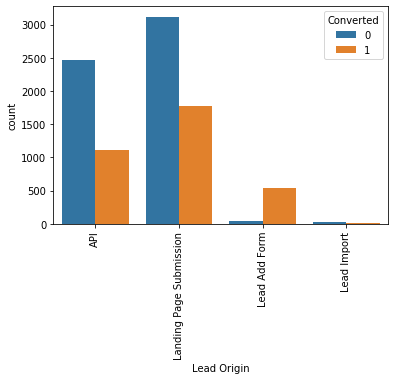

In [64]:
sns.countplot(x="Lead Origin", hue="Converted", data= lead)
xticks(rotation=90)

-  API and Landing Page Submission generate most number of leads. However, Lead Add Form is more promising for lead conversion.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

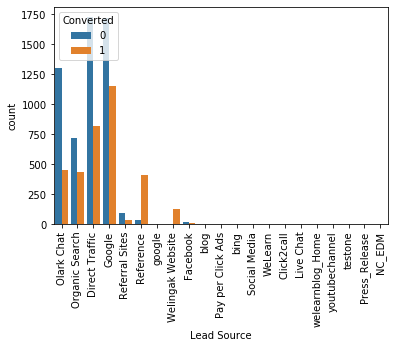

In [65]:
sns.countplot(x= "Lead Source", hue= "Converted", data= lead)
xticks(rotation=90)

-  Maximum leads converted from Direct Traffic and Google. Olark chat and organic search generate lead but convert less. Reference and Welingak Website convert leads but dont generate more.

-  In order to reduce the number of dummies created later, converging some options together.

In [66]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat', 'NC_EDM',  'Press_Release',
      'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [67]:
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

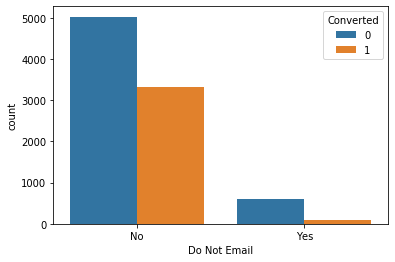

In [68]:
sns.countplot(x= "Do Not Email", hue= "Converted", data=lead)

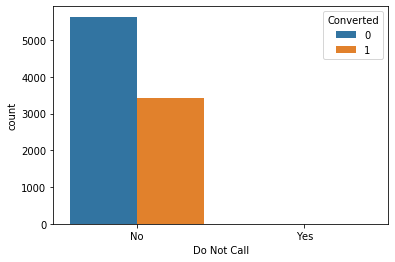

In [69]:
sns.countplot(x= "Do Not Call", hue= "Converted", data= lead)

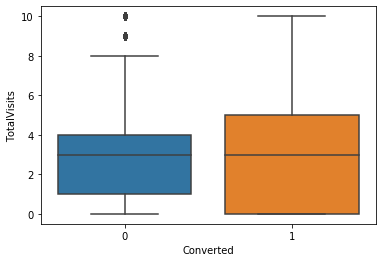

In [70]:
sns.boxplot(x='Converted', y= 'TotalVisits', data=lead)

-  The number of visits varies more for converted. Interested people visit often.

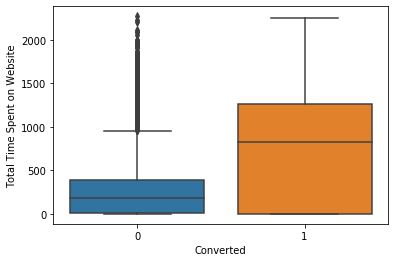

In [71]:
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=lead)

-  Converted people spent huge amounts of time on website.

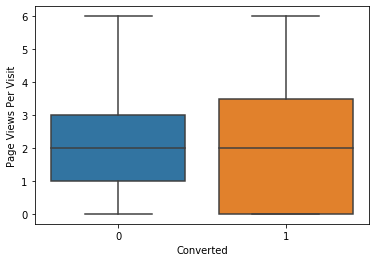

In [72]:
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead)

-  Page views have broad range for converted. But can not say because median is same.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

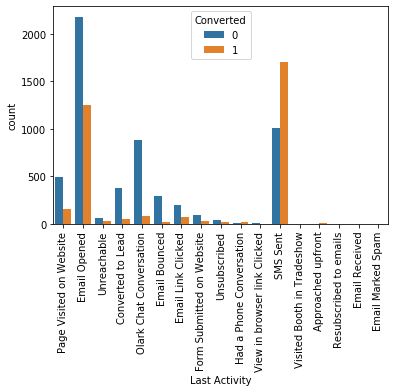

In [73]:
sns.countplot(x="Last Activity", hue= "Converted", data= lead)
xticks(rotation= 90)

-  Email opened and sms sent are the last activities of a lead generated. Converted people open SMS. If the last activity of people is email open or sms sent, then they have high chances of conversion.

In [74]:
lead['Last Activity']= lead['Last Activity'].replace(['Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam', 'Had a Phone Conversation', 'View in browser link Clicked'], 'Other Activities')

In [75]:
#'Specialization', 'What is your current occupation',
#       'What matters most to you in choosing a course',
#       'A free copy of Mastering The Interview'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

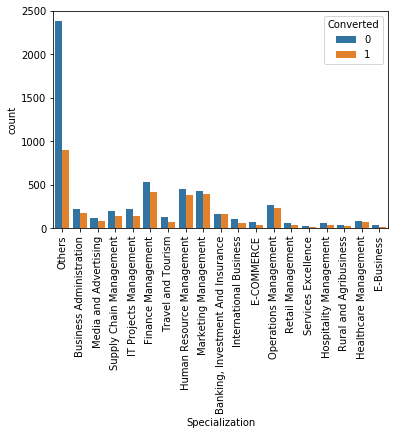

In [76]:
sns.countplot(x="Specialization", hue="Converted", data=lead)
xticks(rotation=90)

-  People from the given specializations have not taken keen interest. Moreover, people with Other specializations have been leads. But maybe on not finding relevant course did not convert.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

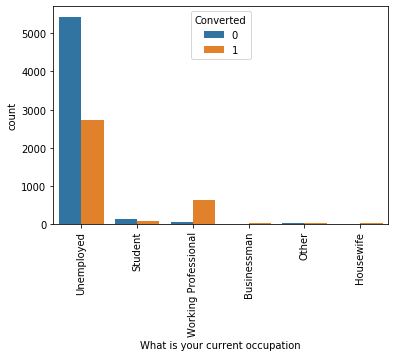

In [77]:
sns.countplot(x="What is your current occupation", hue="Converted", data= lead)
xticks(rotation=90)

-  Unemployed people generate more lead. More focus on placements might help conversion. Working Professionals have high conversion.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

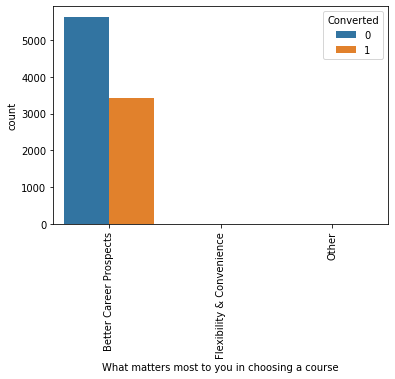

In [78]:
sns.countplot(x="What matters most to you in choosing a course", hue="Converted", data=lead)
xticks(rotation=90)

-  Better career prospects is maximum. It is skewed. Hence, removing from lead.

In [79]:
lead= lead.drop('What matters most to you in choosing a course', axis= 1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

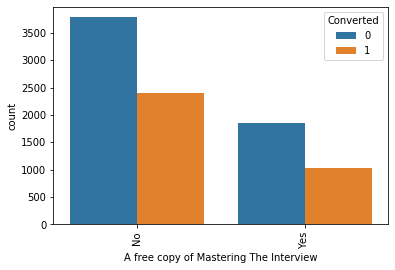

In [80]:
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=lead)
xticks(rotation=90)

-  Not a very insightful variable. Hence, droping it.

In [81]:
lead= lead.drop('A free copy of Mastering The Interview', axis= 1)

In [82]:
lead.shape

(9074, 13)

(5.0, 0.0)

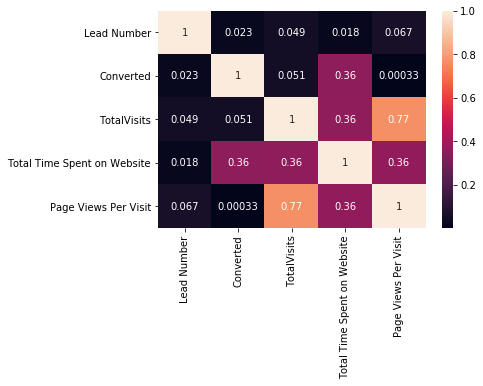

In [83]:
corr_matrix  = lead.corr()
ax = sns.heatmap(corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

-  Total Visits has high correlation with Page views per visit.

In [84]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation'],
      dtype='object')

-  Prospect ID will be used later.
-  Lead Number has no use as of now.
-  Lead Origin: API, Landing Page Submission, Lead Add Form.
-  Lead Source: Google, Direct, Referrals.
-  Do not email: 0/1
-  Do not call: 0/1
-  Converted: Target Variable
-  Total visits, Time spent, Page views: Continuous variables
-  Last activity: SMS, Email
-  Specialization: Finance, international Business
-  Current Occupation: Unemployed, Working, Student

In [85]:
lead.shape

(9074, 13)

### Step 7: Converting Binary to 0/1

In [86]:
variable= ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})
lead[variable]= lead[variable].apply(binary_map)

In [87]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [88]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation'],
      dtype='object')

### Step 8: Creating Dummy variables

-  Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation these are categorical variables for dummy creation.
-  Total Visits, Total time spent on website, page views per visit are continuous variables.
-  Do not email, do not call have been changed into continuous variables.

In [89]:
dummy1= pd.get_dummies(lead[['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation']], drop_first=True)

In [90]:
lead= pd.concat([lead, dummy1], axis=1)

In [91]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,1,0


#### Dropping the repeated variables

In [92]:
lead= lead.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation'], 1)

In [93]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 52 columns):
Prospect ID                                             9074 non-null object
Lead Number                                             9074 non-null int64
Do Not Email                                            9074 non-null int64
Do Not Call                                             9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Origin_Lead Import                                 9074 non-null uint8
Lead Source_Facebook                                

In [94]:
cont_lead = lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [95]:
cont_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,482.887481,2.265943
std,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,10.000000,1839.000000,6.000000


-  Outlier treatment was done before. Gradual increase in values.

In [96]:
lead.isnull().sum()

Prospect ID                                             0
Lead Number                                             0
Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_Re

### Step 9: Test Train Split

In [97]:
X= lead.drop(['Converted', 'Prospect ID'], axis= 1)

In [98]:
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,0,0,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681,0,0,2.0,1428,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
X= X.drop('Lead Number', axis=1)

In [100]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [101]:
y= lead['Converted']

In [102]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 10: Feature Scaling

In [104]:
scaler= StandardScaler()

In [105]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [106]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Step 11: Checking Correlations

(49.0, 0.0)

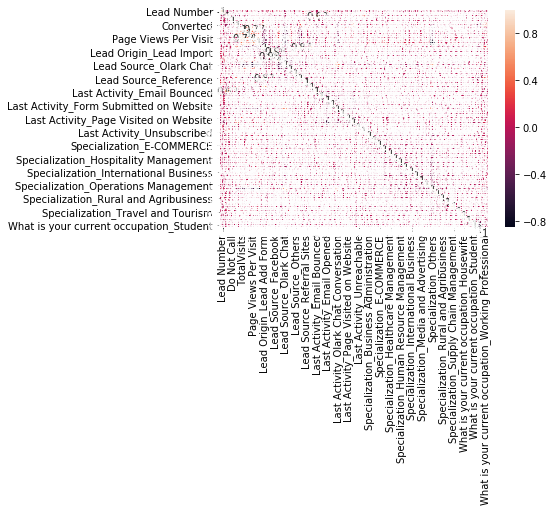

In [107]:
corr_matrix  = lead.corr()
ax = sns.heatmap(corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [108]:
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_df = corr_df.dropna(subset = ['Correlation'])
corr_frame = corr_df.sort_values("Correlation", ascending=False).head(10)
corr_frame

,VAR1,VAR2,Correlation
519,Lead Source_Facebook,Lead Origin_Lead Import,0.983684
773,Lead Source_Reference,Lead Origin_Lead Add Form,0.866191
310,Page Views Per Visit,TotalVisits,0.766567
919,Last Activity_Email Bounced,Do Not Email,0.620041
363,Lead Origin_Landing Page Submission,Page Views Per Visit,0.554142
2052,Specialization_Others,Lead Source_Olark Chat,0.509466
875,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.459142
361,Lead Origin_Landing Page Submission,TotalVisits,0.454350
1134,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.424419
311,Page Views Per Visit,Total Time Spent on Website,0.364735


In [109]:
X_test= X_test.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Lead Origin_Lead Add Form'], 1)

In [110]:
X_train= X_train.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Lead Origin_Lead Add Form'], 1)

In [111]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


(43.0, 0.0)

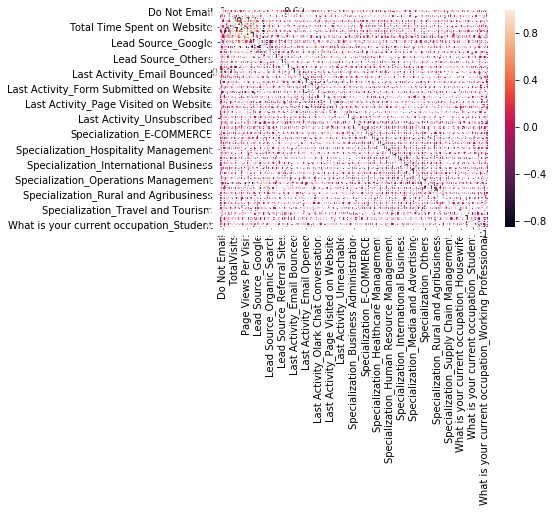

In [112]:
corr_matrix  = X_train.corr()
ax = sns.heatmap(corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [113]:
corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_df = corr_df.dropna(subset = ['Correlation'])
corr_frame = corr_df.sort_values("Correlation", ascending=False).head(10)
corr_frame

,VAR1,VAR2,Correlation
182,Page Views Per Visit,TotalVisits,0.766735
540,Last Activity_Email Bounced,Do Not Email,0.624939
229,Lead Origin_Landing Page Submission,Page Views Per Visit,0.550102
1537,Specialization_Others,Lead Source_Olark Chat,0.505771
227,Lead Origin_Landing Page Submission,TotalVisits,0.447765
727,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.419173
183,Page Views Per Visit,Total Time Spent on Website,0.359709
137,Total Time Spent on Website,TotalVisits,0.349466
1546,Specialization_Others,Last Activity_Olark Chat Conversation,0.345955
364,Lead Source_Organic Search,Page Views Per Visit,0.310740


#### Highly correlated dummy variables must be removed in order to prevent High VIF values later. Also, highly correlated variables do not make the model learn much. Hence, inner correlation between features should be less. 

### Step 12: Model Building

#### First Model

In [114]:
import statsmodels.api as sm

In [115]:
logm1= sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.6
Date:                Mon, 20 Jul 2020   Deviance:                       5429.3
Time:                        20:37:34   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3866      1.121      0.345      0.730      -1.810       2.584
Do Not Email                                            -1.4994      0.208     -7.195      0.000      -1.908      -1.091
Do Not Call                                             22.9059    2.6e+04      0.001      0.999    -5.1e+04     5.1e+04
TotalVisits                                              0.2047      0.054      3.783      0.000       0.099       0.311
Total Time Spent on Website                              1.0046      0.039     25.514      0.000       0.927       1.082
Page Views Per Visit                                    -0.4733      0.061     -7.766      0.000      -0.593      -0.354
Lead Origin_Landing Page Submission                     -1.7434      0.122    -14.246      0.000      -1.983      -1.504
Lead Source_Google                                      -0.1343      0.089     -1.508      0.132      -0.309       0.040
Lead Source_Olark Chat                                   0.1127      0.129      0.872      0.383      -0.141       0.366
Lead Source_Organic Search                              -0.1834      0.127     -1.442      0.149      -0.433       0.066
Lead Source_Others                                       0.5137      0.559      0.918      0.359      -0.583       1.610
Lead Source_Referral Sites                              -0.5711      0.342     -1.670      0.095      -1.241       0.099
Lead Source_Welingak Website                             4.9065      0.740      6.631      0.000       3.456       6.357
Last Activity_Email Bounced                              0.5748      0.475      1.211      0.226      -0.356       1.505
Last Activity_Email Link Clicked                         1.2127      0.295      4.107      0.000       0.634       1.791
Last Activity_Email Opened                               1.5716      0.224      7.020      0.000       1.133       2.010
Last Activity_Form Submitted on Website                  0.6074      0.392      1.548      0.122      -0.162       1.376
Last Activity_Olark Chat Conversation                   -0.0820      0.273     -0.301      0.764      -0.617       0.453
Last Activity_Other Activities                           3.3829      0.503      6.724      0.000       2.397       4.369
Last Activity_Page Visited on Website                    1.0055      0.262      3.840      0.000       0.492       1.519
Last Activity_SMS Sent                                   2.8808      0.226     12.761      0.000       2.438       3.323
Last Activity_Unreachable                                1.9888      0.365      5.450      0.000       1.274       2.704
Last Activity_Unsubscribed                               2

#### Too many features have p value greater than 0.05. Hence, the process of removing variables from this model is manual. Instead using RFE to select the most intutive 15 features.

### Step 14: Feature Selection using RFE

#### Variable Selection technique: RFE

In [116]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [117]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe.support_

array([ True,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True])

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other Activities', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-B

In [120]:
col= X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Other Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [121]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
     

#### Assessing model with StatsModels

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.6
Date:                Mon, 20 Jul 2020   Deviance:                       5561.2
Time:                        20:37:35   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6142      0.145     -4.246      0.000      -0.898      -0.331
Do Not Email                                            -1.3931      0.186     -7.482      0.000      -1.758      -1.028
Do Not Call                                             22.8329   2.68e+04      0.001      0.999   -5.24e+04    5.25e+04
Total Time Spent on Website                              0.9097      0.036     25.266      0.000       0.839       0.980
Lead Origin_Landing Page Submission                     -2.0539      0.113    -18.122      0.000      -2.276      -1.832
Lead Source_Welingak Website                             5.0991      0.740      6.891      0.000       3.649       6.549
Last Activity_Email Link Clicked                         1.0967      0.226      4.848      0.000       0.653       1.540
Last Activity_Email Opened                               1.4152      0.124     11.414      0.000       1.172       1.658
Last Activity_Other Activities                           3.0954      0.453      6.829      0.000       2.207       3.984
Last Activity_Page Visited on Website                    0.9006      0.175      5.160      0.000       0.559       1.243
Last Activity_SMS Sent                                   2.6480      0.126     20.933      0.000       2.400       2.896
Last Activity_Unreachable                                1.6595      0.310      5.352      0.000       1.052       2.267
Last Activity_Unsubscribed                               2.3179      0.468      4.954      0.000       1.401       3.235
Specialization_Others                                   -1.5574      0.115    -13.528      0.000      -1.783      -1.332
What is your current occupation_Housewife               22.9570    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Working Professional     2.6933      0.190     14.174      0.000       2.321       3.066
========================================================================================================================
"""

#### Technical Aspects: Do not call and Current occupation_Housewife has p value greater than 0.05. Hence, removing them from model.

#### Business Aspects: When Do not call and Do not email was analysed in EDA, Do not email was a balanced data. However, Do not call is skewed as all have said NO to calls. Hence, this variable does not determine Conversion. Similarly, Housewife was not a prominent occupation in EDA. Unemployed and Working professionals are more intutive for conversion.

In [123]:
cols=col.drop('Do Not Call', 1)

In [124]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.3
Date:                Mon, 20 Jul 2020   Deviance:                       5564.6
Time:                        20:37:35   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5968      0.144     -4.138      0.000      -0.880      -0.314
Do Not Email                                            -1.3953      0.186     -7.495      0.000      -1.760      -1.030
Total Time Spent on Website                              0.9091      0.036     25.261      0.000       0.839       0.980
Lead Origin_Landing Page Submission                     -2.0615      0.113    -18.190      0.000      -2.284      -1.839
Lead Source_Welingak Website                             5.0986      0.740      6.892      0.000       3.649       6.549
Last Activity_Email Link Clicked                         1.0865      0.226      4.807      0.000       0.644       1.529
Last Activity_Email Opened                               1.4054      0.124     11.370      0.000       1.163       1.648
Last Activity_Other Activities                           3.0858      0.453      6.809      0.000       2.198       3.974
Last Activity_Page Visited on Website                    0.8911      0.174      5.113      0.000       0.550       1.233
Last Activity_SMS Sent                                   2.6385      0.126     20.920      0.000       2.391       2.886
Last Activity_Unreachable                                1.6496      0.310      5.322      0.000       1.042       2.257
Last Activity_Unsubscribed                               2.3100      0.468      4.938      0.000       1.393       3.227
Specialization_Others                                   -1.5664      0.115    -13.610      0.000      -1.792      -1.341
What is your current occupation_Housewife               22.9542    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Working Professional     2.6908      0.190     14.160      0.000       2.318       3.063
========================================================================================================================
"""

In [125]:
cols2= cols.drop('What is your current occupation_Housewife', 1)

In [126]:
X_train_sm = sm.add_constant(X_train[cols2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.2
Date:                Mon, 20 Jul 2020   Deviance:                       5576.4
Time:                        20:37:35   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5846      0.144     -4.057      0.000      -0.867      -0.302
Do Not Email                                            -1.3960      0.186     -7.499      0.000      -1.761      -1.031
Total Time Spent on Website                              0.9077      0.036     25.253      0.000       0.837       0.978
Lead Origin_Landing Page Submission                     -2.0722      0.113    -18.314      0.000      -2.294      -1.850
Lead Source_Welingak Website                             5.0973      0.740      6.889      0.000       3.647       6.547
Last Activity_Email Link Clicked                         1.1075      0.225      4.931      0.000       0.667       1.548
Last Activity_Email Opened                               1.4121      0.124     11.426      0.000       1.170       1.654
Last Activity_Other Activities                           3.0854      0.453      6.808      0.000       2.197       3.974
Last Activity_Page Visited on Website                    0.8910      0.174      5.112      0.000       0.549       1.233
Last Activity_SMS Sent                                   2.6382      0.126     20.915      0.000       2.391       2.885
Last Activity_Unreachable                                1.6485      0.310      5.317      0.000       1.041       2.256
Last Activity_Unsubscribed                               2.3101      0.468      4.938      0.000       1.393       3.227
Specialization_Others                                   -1.5820      0.115    -13.768      0.000      -1.807      -1.357
What is your current occupation_Working Professional     2.6841      0.190     14.119      0.000       2.312       3.057
========================================================================================================================
"""

In [127]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.199381
1012    0.031040
9226    0.417017
4750    0.813519
7987    0.859698
1281    0.692860
2880    0.114590
4971    0.977725
7536    0.776066
1248    0.841295
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19938057, 0.03104002, 0.41701668, 0.81351878, 0.85969848,
       0.69286013, 0.11459028, 0.97772516, 0.77606626, 0.84129494])

#### Creating a dataframe with Converted and the predicted probabilities

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.199381,3009
1,0,0.031040,1012
2,0,0.417017,9226
3,1,0.813519,4750
4,1,0.859698,7987


#### Creating a new column 'Predicted' with 1 if Converted_Prob >0.5 else 0

In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.199381,3009,0
1,0,0.031040,1012,0
2,0,0.417017,9226,0
3,1,0.813519,4750,1
4,1,0.859698,7987,1


## Model Evaluation: Train set || Using 0.5 Threshold

#### Confusion Matrix

In [131]:
from sklearn import metrics

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3430  475]
 [ 854 1592]]


In [133]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7907416154936231


#### VIFs

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols2].values, i) for i in range(X_train[cols2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.83
5,Last Activity_Email Opened,2.18
8,Last Activity_SMS Sent,2.03
11,Specialization_Others,1.78
0,Do Not Email,1.24
7,Last Activity_Page Visited on Website,1.24
1,Total Time Spent on Website,1.13
12,What is your current occupation_Working Profes...,1.13
4,Last Activity_Email Link Clicked,1.09
10,Last Activity_Unsubscribed,1.08


In [137]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Metrics beyond accuracy

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6508585445625511

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8783610755441741

In [141]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.12163892445582586


In [142]:
# positive predictive value 
print (TP / float(TP+FP))

0.7701983551040155


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8006535947712419


### Step 15: ROC Curve

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

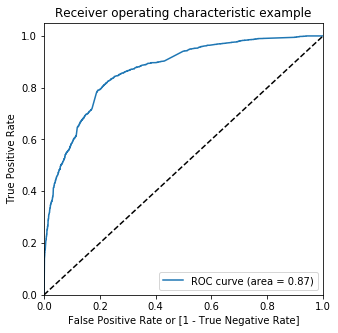

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding optimal cut off

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199381,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.031040,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.417017,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.813519,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.859698,7987,1,1,1,1,1,1,1,1,1,1,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.561014  0.980785  0.298079
0.2   0.2  0.732326  0.889616  0.633803
0.3   0.3  0.770745  0.857727  0.716261
0.4   0.4  0.797670  0.792723  0.800768
0.5   0.5  0.790742  0.650859  0.878361
0.6   0.6  0.776256  0.543745  0.921895
0.7   0.7  0.765549  0.474244  0.948015
0.8   0.8  0.736734  0.359362  0.973111
0.9   0.9  0.700205  0.237531  0.990013


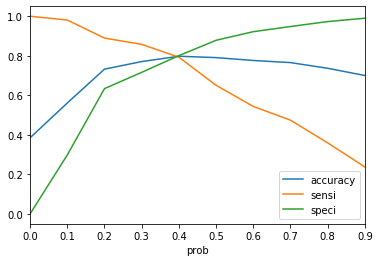

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199381,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.031040,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.417017,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.813519,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.859698,7987,1,1,1,1,1,1,1,1,1,1,0,1


## Model Evaluation: Train Set || 0.4 Threshold

In [151]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7976696583215241

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  778],
       [ 507, 1939]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7927228127555193

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.8007682458386683

In [156]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19923175416133163


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7136547662863453


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.860484314804623


In [159]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.199381,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.031040,1012,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.417017,9226,0,1,1,1,1,1,0,0,0,0,0,1,42
3,1,0.813519,4750,1,1,1,1,1,1,1,1,1,1,0,1,81
4,1,0.859698,7987,1,1,1,1,1,1,1,1,1,1,0,1,86


### Step 16: Precision & Recall

In [160]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3430,  475],
       [ 854, 1592]], dtype=int64)

In [161]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7701983551040155

In [162]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6508585445625511

#### Precision & Recall Trade off

In [163]:
from sklearn.metrics import precision_recall_curve

In [164]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

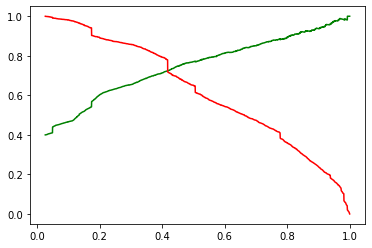

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Explaination of Model:

### Important Variables: Last Activity, Lead Source, Time spent on website
### Accuracy: Overall how often the model is correct? 
### Specificity: When it is actually No, how often does it predict No?
### Sensitivity: When it is actually yes, how often yes is predicted?
### Precision: When it predicts yes, how often is it correct?
### Recall: When it is actually yes, how often yes is predicted?
### False Positive Rate: When it is actually No, how often it is predicted Yes?

-  Precision means if the model is Precise. 68% times the leads can be converted.
-  Recall and Sensitivity means that if the lead has converted, the model can identify it 77% of times.
-  ROC Curve are under it is 0.87. That is a good indication.
-  False positive rate can be high. Because it is a hit and trial method. Some leads classified as Hot will not harm much.

### Step 17: Making prediction on Test set

In [167]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [168]:
X_test = X_test[cols2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional
3271,0,-0.591008,0,0,0,1,0,0,0,0,0,1,0
1490,0,1.894051,1,0,0,1,0,0,0,0,0,0,1
7936,0,-0.743117,0,0,0,1,0,0,0,0,0,1,0
4216,0,-0.878732,0,0,0,1,0,0,0,0,0,0,0
3830,0,-0.578179,1,0,0,1,0,0,0,0,0,0,0


In [169]:
X_test_sm = sm.add_constant(X_test)

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

3271    0.215694
1490    0.959249
7936    0.193253
4216    0.507473
3830    0.145601
1800    0.683129
6507    0.353962
4821    0.287445
4223    0.419207
4714    0.419207
dtype: float64

In [172]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
y_pred_1.head()

,0
3271,0.215694
1490,0.959249
7936,0.193253
4216,0.507473
3830,0.145601


In [174]:
y_test_df = pd.DataFrame(y_test)

In [175]:
y_test_df['Prospect ID'] = y_test_df.index

In [176]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [177]:
y_pred_final.head()

,Converted,Prospect ID,0
3271,0,3271,0.215694
1490,1,1490,0.959249
7936,0,7936,0.193253
4216,1,4216,0.507473
3830,0,3830,0.145601


In [178]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [179]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [180]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
3271,0,3271,0.215694,0
1490,1,1490,0.959249,1
7936,0,7936,0.193253,0
4216,1,4216,0.507473,1
3830,0,3830,0.145601,0


## Model Evalution: Test Set || 0.4 Threshold

In [181]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.791039294895336

In [182]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1389,  345],
       [ 224,  765]], dtype=int64)

In [183]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7735085945399394

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.801038062283737

In [186]:
FP / float(TN+FP)

0.19896193771626297

In [187]:
TP / float(TP+FP)

0.6891891891891891

In [188]:
TN/ float(TN+FN)

0.861128332300062

In [189]:
TP/ float(TP+FP)

0.6891891891891891

In [190]:
TP/ float(TP+FN)

0.7735085945399394

In [191]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted,Lead_Score
3271,0,3271,0.215694,0,22
1490,1,1490,0.959249,1,96
7936,0,7936,0.193253,0,19
4216,1,4216,0.507473,1,51
3830,0,3830,0.145601,0,15


## Building Model Number 2

### Since, Do not call and Housewife Occupation had to be removed, maybe error in not removing Do not call beforehand. Hence, removing Do not call and building model again.

#### Continuing from code 108.

In [192]:
X1= X.drop('Do Not Call', axis=1)

In [193]:
X1.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [194]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, train_size=0.7, test_size=0.3, random_state=100)

In [195]:
scaler= StandardScaler()

In [196]:
X1_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X1_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [197]:
X1_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [198]:
X1_test= X1_test.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Lead Origin_Lead Add Form'], 1)

In [199]:
X1_train= X1_train.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Lead Origin_Lead Add Form'], 1)

In [200]:
X1_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### RFE

In [201]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [202]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X1_train, y_train)

In [203]:
rfe.support_

array([ True, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True])

In [204]:
list(zip(X1_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', False, 24),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Other Activities', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 8),
 ('Spe

In [205]:
col= X1_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Other Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [206]:
X1_train_sm = sm.add_constant(X1_train[col])
logm2 = sm.GLM(y_train,X1_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.2
Date:                Mon, 20 Jul 2020   Deviance:                       5556.4
Time:                        20:39:54   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0294      0.244     -0.121      0.904      -0.507       0.448
Do Not Email                                            -1.3980      0.186     -7.510      0.000      -1.763      -1.033
Total Time Spent on Website                              0.9101      0.036     25.266      0.000       0.840       0.981
Lead Origin_Landing Page Submission                     -2.0510      0.113    -18.113      0.000      -2.273      -1.829
Lead Source_Welingak Website                             5.1107      0.740      6.906      0.000       3.660       6.561
Last Activity_Email Link Clicked                         1.0878      0.226      4.813      0.000       0.645       1.531
Last Activity_Email Opened                               1.4012      0.124     11.333      0.000       1.159       1.643
Last Activity_Other Activities                           3.1038      0.453      6.847      0.000       2.215       3.992
Last Activity_Page Visited on Website                    0.8881      0.174      5.095      0.000       0.546       1.230
Last Activity_SMS Sent                                   2.6502      0.126     20.987      0.000       2.403       2.898
Last Activity_Unreachable                                1.6617      0.311      5.345      0.000       1.052       2.271
Last Activity_Unsubscribed                               2.3306      0.468      4.979      0.000       1.413       3.248
Specialization_Others                                   -1.5511      0.115    -13.484      0.000      -1.777      -1.326
What is your current occupation_Housewife               22.3840    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Unemployed              -0.5974      0.206     -2.894      0.004      -1.002      -0.193
What is your current occupation_Working Professional     2.1134      0.275      7.677      0.000       1.574       2.653
========================================================================================================================
"""

In [207]:
cols2= col.drop('What is your current occupation_Housewife', 1)

In [208]:
X1_train_sm = sm.add_constant(X1_train[cols2])
logm2 = sm.GLM(y_train,X1_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.2
Date:                Mon, 20 Jul 2020   Deviance:                       5564.4
Time:                        20:39:54   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0789      0.238      0.331      0.740      -0.388       0.546
Do Not Email                                            -1.3995      0.186     -7.518      0.000      -1.764      -1.035
Total Time Spent on Website                              0.9093      0.036     25.259      0.000       0.839       0.980
Lead Origin_Landing Page Submission                     -2.0567      0.113    -18.192      0.000      -2.278      -1.835
Lead Source_Welingak Website                             5.1124      0.740      6.907      0.000       3.662       6.563
Last Activity_Email Link Clicked                         1.1032      0.225      4.907      0.000       0.663       1.544
Last Activity_Email Opened                               1.4058      0.124     11.371      0.000       1.164       1.648
Last Activity_Other Activities                           3.1073      0.453      6.855      0.000       2.219       3.996
Last Activity_Page Visited on Website                    0.8875      0.174      5.090      0.000       0.546       1.229
Last Activity_SMS Sent                                   2.6527      0.126     21.001      0.000       2.405       2.900
Last Activity_Unreachable                                1.6637      0.311      5.348      0.000       1.054       2.273
Last Activity_Unsubscribed                               2.3352      0.468      4.989      0.000       1.418       3.253
Specialization_Others                                   -1.5599      0.115    -13.580      0.000      -1.785      -1.335
What is your current occupation_Unemployed              -0.7027      0.201     -3.504      0.000      -1.096      -0.310
What is your current occupation_Working Professional     2.0067      0.271      7.410      0.000       1.476       2.538
========================================================================================================================
"""

In [209]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X1_train_sm)
y_train_pred[:10]

3009    0.194600
1012    0.031633
9226    0.416054
4750    0.812520
7987    0.858975
1281    0.691218
2880    0.111448
4971    0.977247
7536    0.771569
1248    0.840461
dtype: float64

In [210]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19460015, 0.03163306, 0.41605392, 0.81251988, 0.85897476,
       0.69121829, 0.11144815, 0.97724671, 0.77156852, 0.84046053])

In [211]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.194600,3009
1,0,0.031633,1012
2,0,0.416054,9226
3,1,0.812520,4750
4,1,0.858975,7987


In [212]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.194600,3009,0
1,0,0.031633,1012,0
2,0,0.416054,9226,0
3,1,0.812520,4750,1
4,1,0.858975,7987,1


In [213]:
from sklearn import metrics

In [214]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3451  454]
 [ 919 1527]]


In [215]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7838135726657219


In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
vif = pd.DataFrame()
vif['Features'] = X1_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X1_train[cols2].values, i) for i in range(X1_train[cols2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,10.23
2,Lead Origin_Landing Page Submission,4.71
11,Specialization_Others,3.49
5,Last Activity_Email Opened,2.97
8,Last Activity_SMS Sent,2.70
13,What is your current occupation_Working Profes...,1.59
7,Last Activity_Page Visited on Website,1.37
0,Do Not Email,1.27
1,Total Time Spent on Website,1.14
4,Last Activity_Email Link Clicked,1.14


In [218]:
col = cols2.drop('What is your current occupation_Unemployed')

In [219]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Other Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [220]:
# Let's re-run the model using the selected variables
X1_train_sm = sm.add_constant(X1_train[col])
logm4 = sm.GLM(y_train,X1_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.2
Date:                Mon, 20 Jul 2020   Deviance:                       5576.4
Time:                        20:39:55   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5846      0.144     -4.057      0.000      -0.867      -0.302
Do Not Email                                            -1.3960      0.186     -7.499      0.000      -1.761      -1.031
Total Time Spent on Website                              0.9077      0.036     25.253      0.000       0.837       0.978
Lead Origin_Landing Page Submission                     -2.0722      0.113    -18.314      0.000      -2.294      -1.850
Lead Source_Welingak Website                             5.0973      0.740      6.889      0.000       3.647       6.547
Last Activity_Email Link Clicked                         1.1075      0.225      4.931      0.000       0.667       1.548
Last Activity_Email Opened                               1.4121      0.124     11.426      0.000       1.170       1.654
Last Activity_Other Activities                           3.0854      0.453      6.808      0.000       2.197       3.974
Last Activity_Page Visited on Website                    0.8910      0.174      5.112      0.000       0.549       1.233
Last Activity_SMS Sent                                   2.6382      0.126     20.915      0.000       2.391       2.885
Last Activity_Unreachable                                1.6485      0.310      5.317      0.000       1.041       2.256
Last Activity_Unsubscribed                               2.3101      0.468      4.938      0.000       1.393       3.227
Specialization_Others                                   -1.5820      0.115    -13.768      0.000      -1.807      -1.357
What is your current occupation_Working Professional     2.6841      0.190     14.119      0.000       2.312       3.057
========================================================================================================================
"""

In [221]:
y_train_pred = res.predict(X1_train_sm).values.reshape(-1)

In [222]:
y_train_pred[:10]

array([0.19938057, 0.03104002, 0.41701668, 0.81351878, 0.85969848,
       0.69286013, 0.11459028, 0.97772516, 0.77606626, 0.84129494])

In [223]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.199381,3009
1,0,0.031040,1012
2,0,0.417017,9226
3,1,0.813519,4750
4,1,0.859698,7987


In [224]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.199381,3009,0
1,0,0.031040,1012,0
2,0,0.417017,9226,0
3,1,0.813519,4750,1
4,1,0.859698,7987,1


In [225]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3430  475]
 [ 854 1592]]


In [226]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7907416154936231


In [227]:
vif = pd.DataFrame()
vif['Features'] = X1_train[col].columns
vif['VIF'] = [variance_inflation_factor(X1_train[col].values, i) for i in range(X1_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.83
5,Last Activity_Email Opened,2.18
8,Last Activity_SMS Sent,2.03
11,Specialization_Others,1.78
0,Do Not Email,1.24
7,Last Activity_Page Visited on Website,1.24
1,Total Time Spent on Website,1.13
12,What is your current occupation_Working Profes...,1.13
4,Last Activity_Email Link Clicked,1.09
10,Last Activity_Unsubscribed,1.08


In [228]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

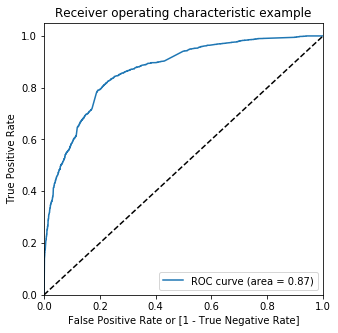

In [229]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## This model is giving exact same results as Model 1. Hence, not going forward with it.